<a href="https://colab.research.google.com/github/ouafighizlene21/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ Segmentation des clients du centre commercial avec K-Means & DBSCAN  
### 📊 Apprentissage non supervisé - Analyse du comportement des clients

---

# 🛍️ Mall Customer Segmentation using K-Means & DBSCAN  
### 📊 Unsupervised Learning - Customer Behavior Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


## 📂 Upload a ZIP file (mall.zip)
## 📂 Télécharger un fichier ZIP (mall.zip)


In [6]:
from google.colab import files
files.upload()  # Choisis mall.zip


Saving archive (1).zip to archive (1) (1).zip


{'archive (1) (1).zip': b'PK\x03\x04-\x00\x00\x00\x08\x00@qCO\xc7\xec\xa4[\xff\xff\xff\xff\xff\xff\xff\xff\x12\x00\x14\x00Mall_Customers.csv\x01\x00\x10\x00\x8d\x0f\x00\x00\x00\x00\x00\x00\x81\x05\x00\x00\x00\x00\x00\x00]W\xcb\xae\\E\x0c\xdc\x8f4\xffp\x17,\x88t\x90\xfa\xfdXF P\x16\xac\xf2\x05Q\x18E\x88d\x82.\xe4\xff\xa9\xaa~\xb8\xc3nT\xe3v\x97\xcbv\xdb\xe7\xe7o\xff\xfc\xfb\xf5\xcb\xe3\xf5\xdd/\xd7o\x8f\xe7\x1f\x8f\xd7\xeb\xed\xa7\xc7\xf5\xf6\xf9\xfc\xf6\xe1\xf3\xcb\xbb\xe7G\xfc\xf7\xf2\xe3_?\xbc\xb9\xde\xff\x8d\xbf\xff|~zy\xff\xf1\xeb+0\xff\x93w\xee\xcd\xfd\xe6\xaf\xdf?|~\\\xbe_>_\xb1\xdfoa\x00\xc1\x13h\xfe~\x8b\xd7\xaf\x8f/\x82\xdc\xe5\xcbU\xee\xb7\xb4\x91H\xa4\xd6\xfb-/(\xe2\\\xbd\x92\xbb\xdf\xca\xb6\n\x84*\x0e\xd6m\x95/\xdf\xe8\xaa\x9d\xae\xda\xd5\xd3\xfd\xd6\x07\x81\x92H*\x82\xa1\xdb\xa7\x1c\xa1\x1a\x80M\xda\xa5\x8a9N\xf9p\xfa\xeeWG(~S\xcfM\xec30#\x9f\x88\x91<\x02\x95\xb7Xe\xc5;\xcbT!\xc8\x86\xbeN\xee\x10\'\xd2W\x9bV\x8eHA8~\x92\xcf\x81\x01\x05\xca\xe9\xces\xf1\xea\r\xd8dO$\xc9SX\x

## 📂 Extract Mall.zip file
## 📂 Extraire le fichier Mall.zip


In [11]:
import zipfile

with zipfile.ZipFile("Mall.zip", 'r') as zip_ref:
    zip_ref.extractall(".")


## 📊 Load and preview Mall Customers data
## 📊 Charger et afficher les données des clients du Mall


In [12]:
data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='CustomerID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Spending Score (1-100)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Spending Score (1-100)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='CustomerID', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Annual Income (k$)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 📝 Explore Mall Customers dataset
## 📝 Explorer le dataset des clients du Mall


In [13]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 💰 Select features for clustering
## 💰 Sélectionner les caractéristiques pour le clustering


In [14]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


## ⚖️ Scale features
## ⚖️ Normaliser les caractéristiques


In [15]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 📈 Elbow Method to find optimal clusters
## 📈 Méthode du coude pour trouver le nombre optimal de clusters


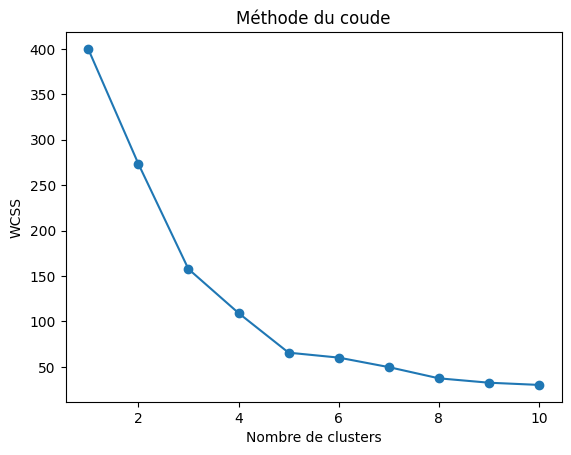

In [16]:

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("WCSS")
plt.show()


## 🏷️ Apply KMeans clustering
## 🏷️ Appliquer le clustering KMeans


In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

data['Cluster'] = labels
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## 🎨 Visualize customer segments
## 🎨 Visualiser les segments de clients


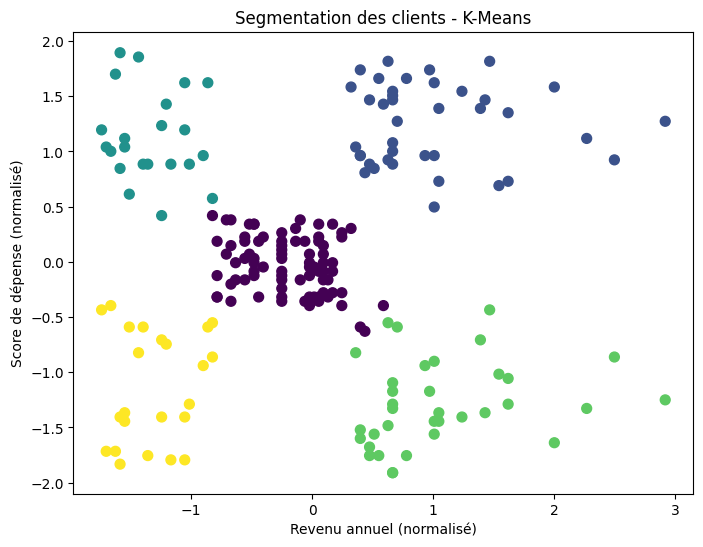

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis', s=50)
plt.title("Segmentation des clients - K-Means")
plt.xlabel("Revenu annuel (normalisé)")
plt.ylabel("Score de dépense (normalisé)")
plt.show()


## 📊 Analyze cluster characteristics
## 📊 Analyser les caractéristiques des clusters


In [19]:
data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
